# ERA5 


ERA5 products can be downloaded from https://cds.climate.copernicus.eu/#!/home by using the download method of the corresponding product object. For this example we will have a look at the surface temperature of the ERA5 product on single levels at monthly resolution. 

**Download data**

In [1]:
from datetime import datetime
from pansat.products.reanalysis.era5 import ERA5Product

t_0 = datetime(2005, 3, 1, 0)
t_1 = datetime(2005, 11, 1, 0)

# create product instance 
global_srfc_temps = ERA5Product('monthly','surface', ['2m_temperature'])

In [2]:
files = global_srfc_temps.download(t_0, t_1)

Please enter your pansat user password:
········


The variable *files* now contains the downloaded files. Now we can open the data of a given file by calling the *ERA5Product.open()* method. This will return an xarray dataset object, which is easy to handle. 

In [6]:
temp_data = global_srfc_temps.open(filename = files[0])

# display xarray dataset object with its dimensions, coordinates, variables and attributes:
display(temp_data)

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2020-03-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-15 19:16:38 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

**Plot data** 

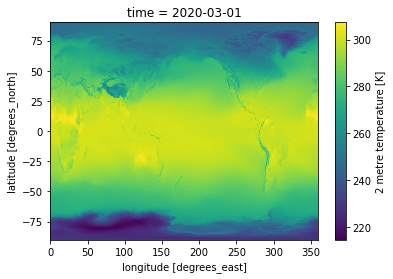

In [12]:
# using xarrays inbuild plot function 
temp_data.t2m[0].plot.pcolormesh()

In [14]:
# get data points 
temps = temp_data.t2m[0]
lons = temp_data.longitude
lats = temp_data.latitude

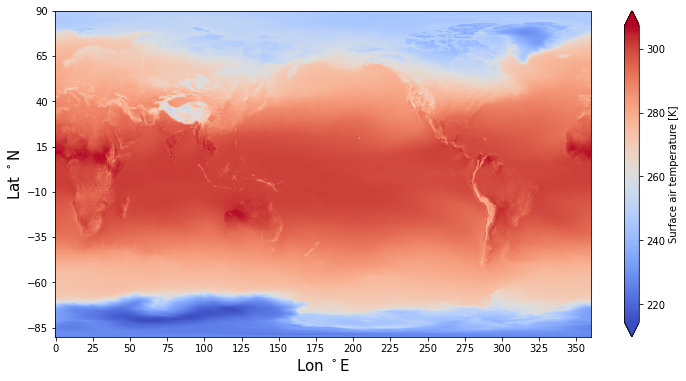

In [15]:
# customize your own plot 
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
fontsize= 15
plt.pcolormesh(lons, lats, temps, shading = 'auto', cmap = 'coolwarm')
plt.colorbar(label="Surface air temperature [K]", extend = 'both')
plt.xticks(lons[::100])
plt.yticks(lats[::100])
plt.xlabel('Lon $^\circ$E', fontsize= fontsize)
plt.ylabel('Lat $^\circ$N', fontsize= fontsize);


**Subset domain**

You may want to subset the dataset, in order to extract a specific region of the globe:

In [20]:
t_0 = datetime(1999, 8, 1, 0)
t_1 = datetime(1999, 9, 1, 0)

# create product instance 
arctic_srfc_temps = ERA5Product('monthly','surface', ['mean_sea_level_pressure'], [60,90,-179, 180])

# download 
files = arctic_srfc_temps.download(t_0, t_1)

2020-11-02 17:35:57,047 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means


Creating file:  url: https://cds.climate.copernicus.eu/api/v2
key: 63394:602acfdf-3bd4-43d5-9e0e-50fe7dc26ed2



2020-11-02 17:35:57,259 INFO Request is queued
2020-11-02 17:35:58,300 INFO Request is running
2020-11-02 17:35:59,838 INFO Request is completed
2020-11-02 17:35:59,839 INFO Downloading http://136.156.133.46/cache-compute-0015/cache/data6/adaptor.mars.internal-1604334957.4891286-29913-14-4c48fdbb-57ed-4a46-b2e1-8b4ce0432126.nc to ERA5/reanalysis-era5-single-levels-monthly-means/reanalysis-era5-single-levels-monthly-means_199908_mean_sea_level_pressure90--179-60-180.nc (346.8K)
2020-11-02 17:36:00,047 INFO Download rate 1.6M/s 


file downloaded and saved as ERA5/reanalysis-era5-single-levels-monthly-means/reanalysis-era5-single-levels-monthly-means_199908_mean_sea_level_pressure90--179-60-180.nc


In [10]:
arctic_data

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 1437, time: 1)
Coordinates:
  * longitude  (longitude) float32 -179.0 -178.75 -178.5 ... 179.5 179.75 180.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 60.5 60.25 60.0
  * time       (time) datetime64[ns] 1999-08-01
Data variables:
    asn        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-02 16:31:18 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

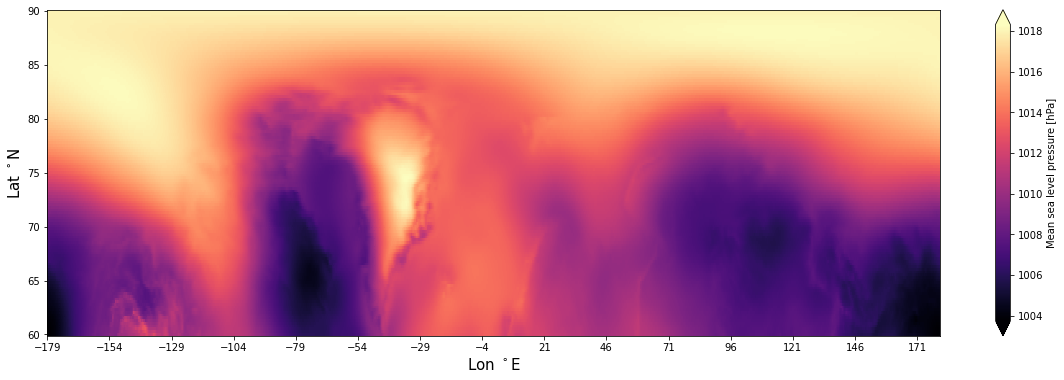

In [26]:
# open file 
arctic_data = arctic_srfc_temps.open(filename = files[0])
# get data points as numpy arrays 
arctic_pressure = arctic_data.msl[0].values
lons = arctic_data.longitude.values
lats = arctic_data.latitude.values 


plt.figure(figsize= (20, 6))
fontsize= 15
plt.pcolormesh(lons, lats, arctic_pressure/100, shading = 'auto', cmap = 'magma')
plt.colorbar(label="Mean sea level pressure [hPa]", extend = 'both')
plt.xticks(lons[::100])
plt.yticks(lats[::20])
plt.xlabel('Lon $^\circ$E', fontsize= fontsize)
plt.ylabel('Lat $^\circ$N', fontsize= fontsize);
